In [9]:
import numpy as np # linear algebra
import pandas as pd

In [10]:
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv(r'C:\Users\sisir.sahu\Downloads\Machine Learning\Decision Tree Classifier\tennis.csv')

In [4]:
data1 = data.copy()

In [5]:
data.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Tennis    0
dtype: int64

In [6]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [12]:
#Split data into x and y    
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

y = y.reshape(-1, 1)

In [13]:
#split x and y into training and test dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
#scale the target variable
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

x_train = oe.fit_transform(x_train)
x_test  = oe.transform(x_test)

In [15]:
#transform categorical target to numerical target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)   

C:\Users\sisir.sahu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
#scaling not required in tree based algorithms

#Import decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
clr = DecisionTreeClassifier(criterion = 'entropy')
clr.fit(x_train, y_train)
y_pred = clr.predict(x_test)
y_pred = y_pred.reshape(-1,1)

In [17]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0]
 [0 2]]


In [18]:
#Accuracy Score or Recall
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
ac

1.0

In [19]:
#Classification report
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           1       1.00      1.00      1.00         2\n\n    accuracy                           1.00         3\n   macro avg       1.00      1.00      1.00         3\nweighted avg       1.00      1.00      1.00         3\n'

In [20]:
bias = clr.score(x_train, y_train) #Bias
variance = clr.score(x_test, y_test)  #Variance

print(bias, variance)

1.0 1.0


[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(33.480000000000004, 65.232, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(66.96000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(234.36, 65.232, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(200.88000000000002, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 21.744, '

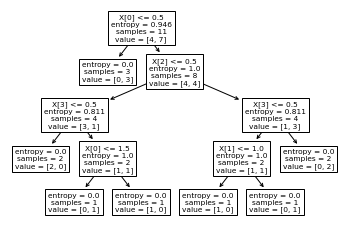

In [21]:
from sklearn.tree import plot_tree
plot_tree(clr)

In [22]:
x_test

array([[1., 2., 1., 1.],
       [0., 2., 0., 0.],
       [2., 1., 0., 1.]])